In [1]:
%matplotlib inline

In [2]:
import os
import sys
import git
import pathlib

import random
import time
import glob

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist


PROJ_ROOT_PATH = pathlib.Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
PROJ_ROOT =  str(PROJ_ROOT_PATH)
if PROJ_ROOT not in sys.path:
    sys.path.append(PROJ_ROOT)

from libs import utils
from libs.ga.ga_utils import get_chromosomes

import pandas as pd
import matplotlib.pyplot as plt
import ipynbname

In [3]:
# set seed
this_seed = 84376
tf.random.set_seed(this_seed)
np.random.seed(this_seed)
random.seed(this_seed)
os.environ['PYTHONHASHSEED']=str(this_seed)

In [4]:
experiment = "mnist32-cnn_1024_256_64-2920--LIM_05-2188"
print(experiment)
model_instance, error_profile_tag = experiment.split("--")

mnist32-cnn_1024_256_64-2920--LIM_05-2188


In [5]:
error_param = -1 # bitflips
optim_type = "all"
META_RS = "vanilla"
print("ERR_PARAM:\t", error_param)
print("OPTIM_TYPE:\t", optim_type)
print("META_RS:\t", META_RS)

ERR_PARAM:	 -1
OPTIM_TYPE:	 all
META_RS:	 vanilla


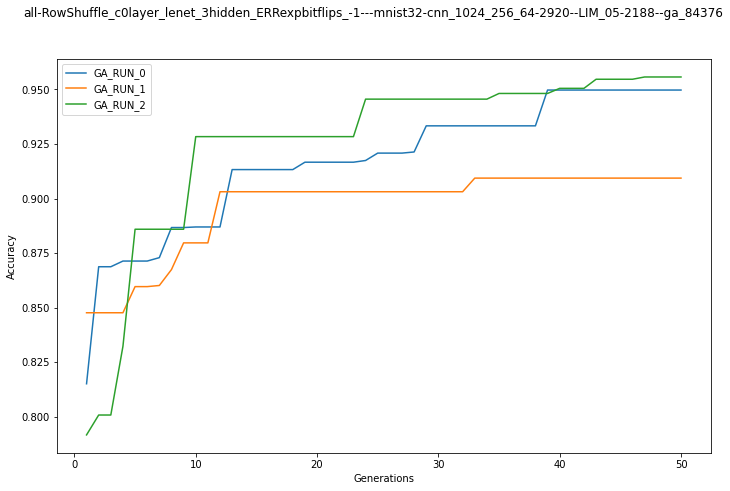

In [6]:
# Evaluate after error injection

layer = "c0layer" # "h2layer"

archerr_type = "lenet_3hidden_ERRexpbitflips"
meta_experiment_name = model_instance + '--' + error_profile_tag
RS_experiment_type = optim_type + "-" + "RowShuffle_" + layer + "_" + archerr_type + "_" + str(error_param)
ga_experiment_name = meta_experiment_name + '--ga_' + str(this_seed)
   
# Folder to load log files
logging_folder = pathlib.Path(PROJ_ROOT_PATH / "logging" / META_RS / archerr_type /  meta_experiment_name / RS_experiment_type )

ga_logging_filename_tag = pathlib.Path(logging_folder/ ga_experiment_name)

# ga outputs
ga_output_files = glob.glob(str(ga_logging_filename_tag) + "*.csv")

# Plot figure
fig_width = 3.125/0.8 *3
fig_height = fig_width / 1.618

fig, axs = plt.subplots(nrows=1,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

# plot GA outputs
for i, filename in enumerate(ga_output_files):
    df = pd.read_csv(filename)
    x = df['Generation']
    y = df['Accuracy']
    
    # get experiment parameters
    logfile = pathlib.Path(filename).with_suffix(".log")
    with open(logfile) as f:
        lines = f.readlines()
        POP_SIZE = lines[2].split()[2]
        N_GENERATIONS = lines[1].split()[3]
        CR = lines[3].split()[2][:4]
        MR = lines[4].split()[2][:4]

    # plot
    axs.set_xlabel("Generations")
    axs.set_ylabel("Accuracy")
    axs.plot(x,y, label="GA_RUN_"+str(i))
    
# plot original_accuracy
# axs.axhline(y = original_accuracy[0] ,color='r', linestyle='--', linewidth=1.0)


# Get notebook path
nb_path = str(ipynbname.path())
fig_filename_tag = RS_experiment_type+"---"+ ga_experiment_name
fig.suptitle(fig_filename_tag)
fig_folder = pathlib.Path(PROJ_ROOT_PATH / "figures")
pathlib.Path(fig_folder).mkdir(parents=True, exist_ok=True)
fig_filename = pathlib.Path(fig_folder/ fig_filename_tag)
fig.savefig(fig_filename,
    # pathlib.Path(fig_filename).with_suffix(".png"), 
            dpi=300, 
            bbox_inches='tight', 
            transparent=True, 
            metadata={"genfilepath": nb_path})
    
    # exp_label = filename + "; Pop: " + POP_SIZE + "; Gen: " + N_GENERATIONS + "; CR:  " + CR + "; MR:  " + MR
    # axs.plot(x,y, label=exp_label)
    
axs.legend()

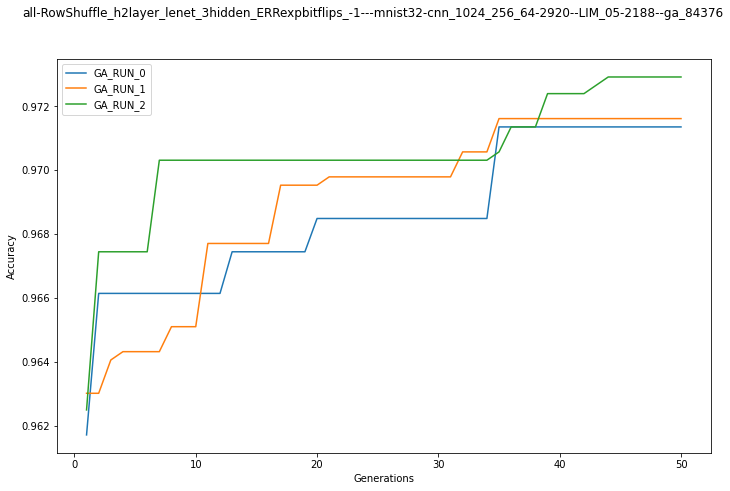

In [7]:
# Evaluate after error injection

layer = "h2layer" # "h2layer"

archerr_type = "lenet_3hidden_ERRexpbitflips"
meta_experiment_name = model_instance + '--' + error_profile_tag
RS_experiment_type = optim_type + "-" + "RowShuffle_" + layer + "_" + archerr_type + "_" + str(error_param)
ga_experiment_name = meta_experiment_name + '--ga_' + str(this_seed)
   
# Folder to load log files
logging_folder = pathlib.Path(PROJ_ROOT_PATH / "logging" / META_RS / archerr_type /  meta_experiment_name / RS_experiment_type )

ga_logging_filename_tag = pathlib.Path(logging_folder/ ga_experiment_name)

# ga outputs
ga_output_files = glob.glob(str(ga_logging_filename_tag) + "*.csv")

# Plot figure
fig_width = 3.125/0.8 *3
fig_height = fig_width / 1.618

fig, axs = plt.subplots(nrows=1,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

# plot GA outputs
for i, filename in enumerate(ga_output_files):
    df = pd.read_csv(filename)
    x = df['Generation']
    y = df['Accuracy']
    
    # get experiment parameters
    logfile = pathlib.Path(filename).with_suffix(".log")
    with open(logfile) as f:
        lines = f.readlines()
        POP_SIZE = lines[2].split()[2]
        N_GENERATIONS = lines[1].split()[3]
        CR = lines[3].split()[2][:4]
        MR = lines[4].split()[2][:4]

    # plot
    axs.set_xlabel("Generations")
    axs.set_ylabel("Accuracy")
    axs.plot(x,y, label="GA_RUN_"+str(i))
    
# plot original_accuracy
# axs.axhline(y = original_accuracy[0] ,color='r', linestyle='--', linewidth=1.0)


# Get notebook path
nb_path = str(ipynbname.path())
fig_filename_tag = RS_experiment_type+"---"+ ga_experiment_name
fig.suptitle(fig_filename_tag)
fig_folder = pathlib.Path(PROJ_ROOT_PATH / "figures")
pathlib.Path(fig_folder).mkdir(parents=True, exist_ok=True)
fig_filename = pathlib.Path(fig_folder/ fig_filename_tag)
fig.savefig(fig_filename,
    # pathlib.Path(fig_filename).with_suffix(".png"), 
            dpi=300, 
            bbox_inches='tight', 
            transparent=True, 
            metadata={"genfilepath": nb_path})
    
    # exp_label = filename + "; Pop: " + POP_SIZE + "; Gen: " + N_GENERATIONS + "; CR:  " + CR + "; MR:  " + MR
    # axs.plot(x,y, label=exp_label)
    
axs.legend()